In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Graph(): 
    
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)] 

    def minDistance(self, dist, sptSet): 
        min = sys.maxsize 
        for v in range(self.V): 
            if dist[v] < min and sptSet[v] == False: 
                min = dist[v] 
                min_index = v 
        return min_index 

    def dijkstra(self, src): 
        dist = [sys.maxsize] * self.V 
        dist[src] = 0
        sptSet = [False] * self.V 
        for cout in range(self.V): 
            u = self.minDistance(dist, sptSet) 
            sptSet[u] = True
            for v in range(self.V): 
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]: 
                    dist[v] = dist[u] + self.graph[u][v] 
        return dist

Matriz de rutas: 
[[0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 0 0 0 1]
 [0 0 0 0 1 1 1 1 0 1]
 [0 0 1 1 0 1 1 0 0 0]
 [0 1 1 1 1 0 0 0 1 0]
 [0 0 0 1 1 0 0 1 0 0]
 [0 1 0 1 0 0 1 0 1 0]
 [1 1 0 0 0 1 0 1 0 0]
 [0 0 1 1 0 0 0 0 0 0]]
Matriz de movimientos: 
[[0. 4.]
 [1. 6.]
 [0. 2.]
 [6. 4.]
 [2. 0.]]


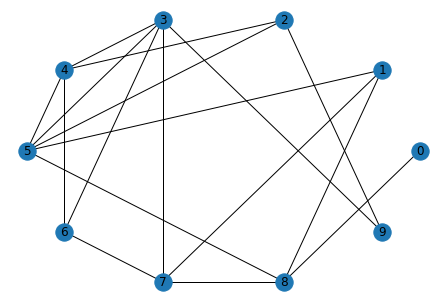

In [44]:
n1 = 10
n2 = 5
a = 0
distance = np.zeros([n1,n1])
moves = np.zeros([n2, 2])

while (np.linalg.matrix_rank(a)!=n1):
    a = np.random.randint(2, size=(n1,n1))
    np.fill_diagonal(a,0)
    a = np.tril(a) + np.tril(a, -1).T
print("Matriz de rutas: \n{}".format(a))

g = Graph(n1) 
g.graph = np.copy(a)
"""
for i in range(n1):
    distance[:, i] = g.dijkstra(i)
print("Matriz de distancias: \n{}".format(distance))
"""

for i in range(n2):
    moves[i,:] = np.random.choice(n1, 2)
print("Matriz de movimientos: \n{}".format(moves))

net = nx.from_numpy_matrix(a)
for e in net.edges():
    net[e[0]][e[1]]['color'] = 'black'
    

nx.draw_circular(net, with_labels=True)
plt.show()

['#44FB37', '#77E88A', '#0B5FA2', '#4F9067', '#85412F']
Para llegar desde 0.0 hasta 4.0 hay que hacer el siguiente camino: [0, 8, 7, 3, 4]
Para llegar desde 1.0 hasta 6.0 hay que hacer el siguiente camino: [1, 8, 1, 7, 6]
Para llegar desde 0.0 hasta 2.0 hay que hacer el siguiente camino: [0, 8, 7, 8, 7, 3, 6, 7, 6, 4, 2]
Para llegar desde 6.0 hasta 4.0 hay que hacer el siguiente camino: [6, 4]
Para llegar desde 2.0 hasta 0.0 hay que hacer el siguiente camino: [2, 9, 2, 9, 2, 9, 2, 9, 2, 5, 4, 3, 6, 3, 7, 6, 4, 3, 4, 2, 4, 5, 1, 8, 0]


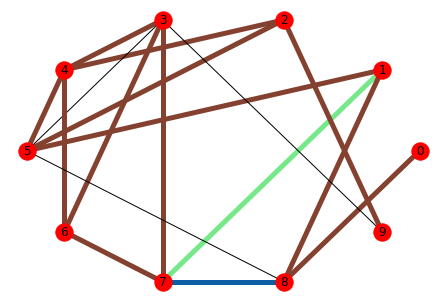

In [45]:
colores = []
for i in range(n2):
    color = np.base_repr(np.random.choice(16777215), base=16)
    colores.append('#{:0>6}'.format(color))
print(colores)

iter = 0
for i in range(n2):
    flag1 = 0
    x = int(moves[i,0])
    y = int(moves[i,1])
    camino = []
    camino.append(x)
    while (not flag1) or (iter == 100) :
        iter += 1
        flag2 = 0
        for j in range(n1):            
            if (a[x,y] != 0) or (x==y):
                camino.append(y)
                if (x != y):
                    net[camino[-2]][camino[-1]]['color'] = colores[i]
                    net[camino[-2]][camino[-1]]['weight'] = 5                    
                #a[x,y]=0
                flag1 = 1
                break

        if not flag1:
            while not flag2:
                x1 = np.random.choice(n1)
                if (a[x,x1] != 0):
                    x = np.copy(x1)
                    camino.append(x1)
                    net[camino[-2]][camino[-1]]['color'] = colores[i]
                    net[camino[-2]][camino[-1]]['weight'] = 5           
                    #a[x,y]=0
                    flag2 = 1

    print("Para llegar desde {} hasta {} hay que hacer el siguiente camino: {}".format(moves[i,0],moves[i,1], camino))

edge_weights_list = [net[e[0]][e[1]]['weight'] for e in net.edges()]
edge_color_list = [net[e[0]][e[1]]['color'] for e in net.edges()]
nx.draw_circular(net, with_labels=True,node_color='red',edge_color = edge_color_list, width=edge_weights_list)
plt.show()

In [5]:
"""
p = nx.shortest_path(net,int(moves[i,0]),int(moves[i,1]))
for e in net.edges():
    net[e[0]][e[1]]['color'] = 'black'
    
for i in range(len(p)-1):
    net[p[i]][p[i+1]]['color'] = 'blue'

edge_color_list = [ net[e[0]][e[1]]['color'] for e in net.edges() ]
nx.draw_circular(net,node_color='red',edge_color = edge_color_list, with_labels = True)
plt.show()
"""

"\np = nx.shortest_path(net,int(moves[i,0]),int(moves[i,1]))\nfor e in net.edges():\n    net[e[0]][e[1]]['color'] = 'black'\n    \nfor i in range(len(p)-1):\n    net[p[i]][p[i+1]]['color'] = 'blue'\n\nedge_color_list = [ net[e[0]][e[1]]['color'] for e in net.edges() ]\nnx.draw_circular(net,node_color='red',edge_color = edge_color_list, with_labels = True)\nplt.show()\n"